In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [511]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_columns = 500
pd.options.display.max_rows = 10000
df = pd.read_csv('finalDataModel.csv', low_memory=False, index_col=False)
df.dropna(inplace=True)

def get_z_score(value,mean,std):
    return (value-mean)/std
df['z_score_fiyat'] = df['fiyat'].apply(lambda x: get_z_score(x,df['fiyat'].mean(),df['fiyat'].std()))
filtered_data = df[df['z_score_fiyat'] < 3]
df = filtered_data
df.drop(['z_score_fiyat'], axis=1, inplace=True)
df['log_fiyat'] = np.log1p(df['fiyat'])
df.drop(['fiyat'], axis=1, inplace=True)
# combine bedroom and living room
df['rooms'] = df['living_rooms'] + df['bedrooms']
df.drop(['living_rooms', 'bedrooms'], axis=1, inplace=True)



In [512]:
X = df.drop(['log_fiyat'],axis=1)
y = df['log_fiyat']

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [514]:
train_data = X_train.join(y_train)



array([[<Axes: title={'center': 'Net Metrekare'}>,
        <Axes: title={'center': 'Bulunduğu Kat'}>,
        <Axes: title={'center': 'Isıtma Tipi'}>,
        <Axes: title={'center': 'Site İçerisinde'}>,
        <Axes: title={'center': 'Balkon Durumu'}>,
        <Axes: title={'center': 'Tipi'}>],
       [<Axes: title={'center': 'Brüt Metrekare'}>,
        <Axes: title={'center': 'Binanın Yaşı'}>,
        <Axes: title={'center': 'Binanın Kat Sayısı'}>,
        <Axes: title={'center': 'Kullanım Durumu'}>,
        <Axes: title={'center': 'Banyo Sayısı'}>,
        <Axes: title={'center': 'Fiyat Durumu'}>],
       [<Axes: title={'center': 'Balkon Sayısı'}>,
        <Axes: title={'center': 'Eşya Durumu'}>,
        <Axes: title={'center': 'Takas'}>,
        <Axes: title={'center': 'Yapı Tipi'}>,
        <Axes: title={'center': 'WC Sayısı'}>,
        <Axes: title={'center': 'Görüntülü Gezilebilir mi?'}>],
       [<Axes: title={'center': 'Depozito'}>,
        <Axes: title={'center': 'Aidat'}>,


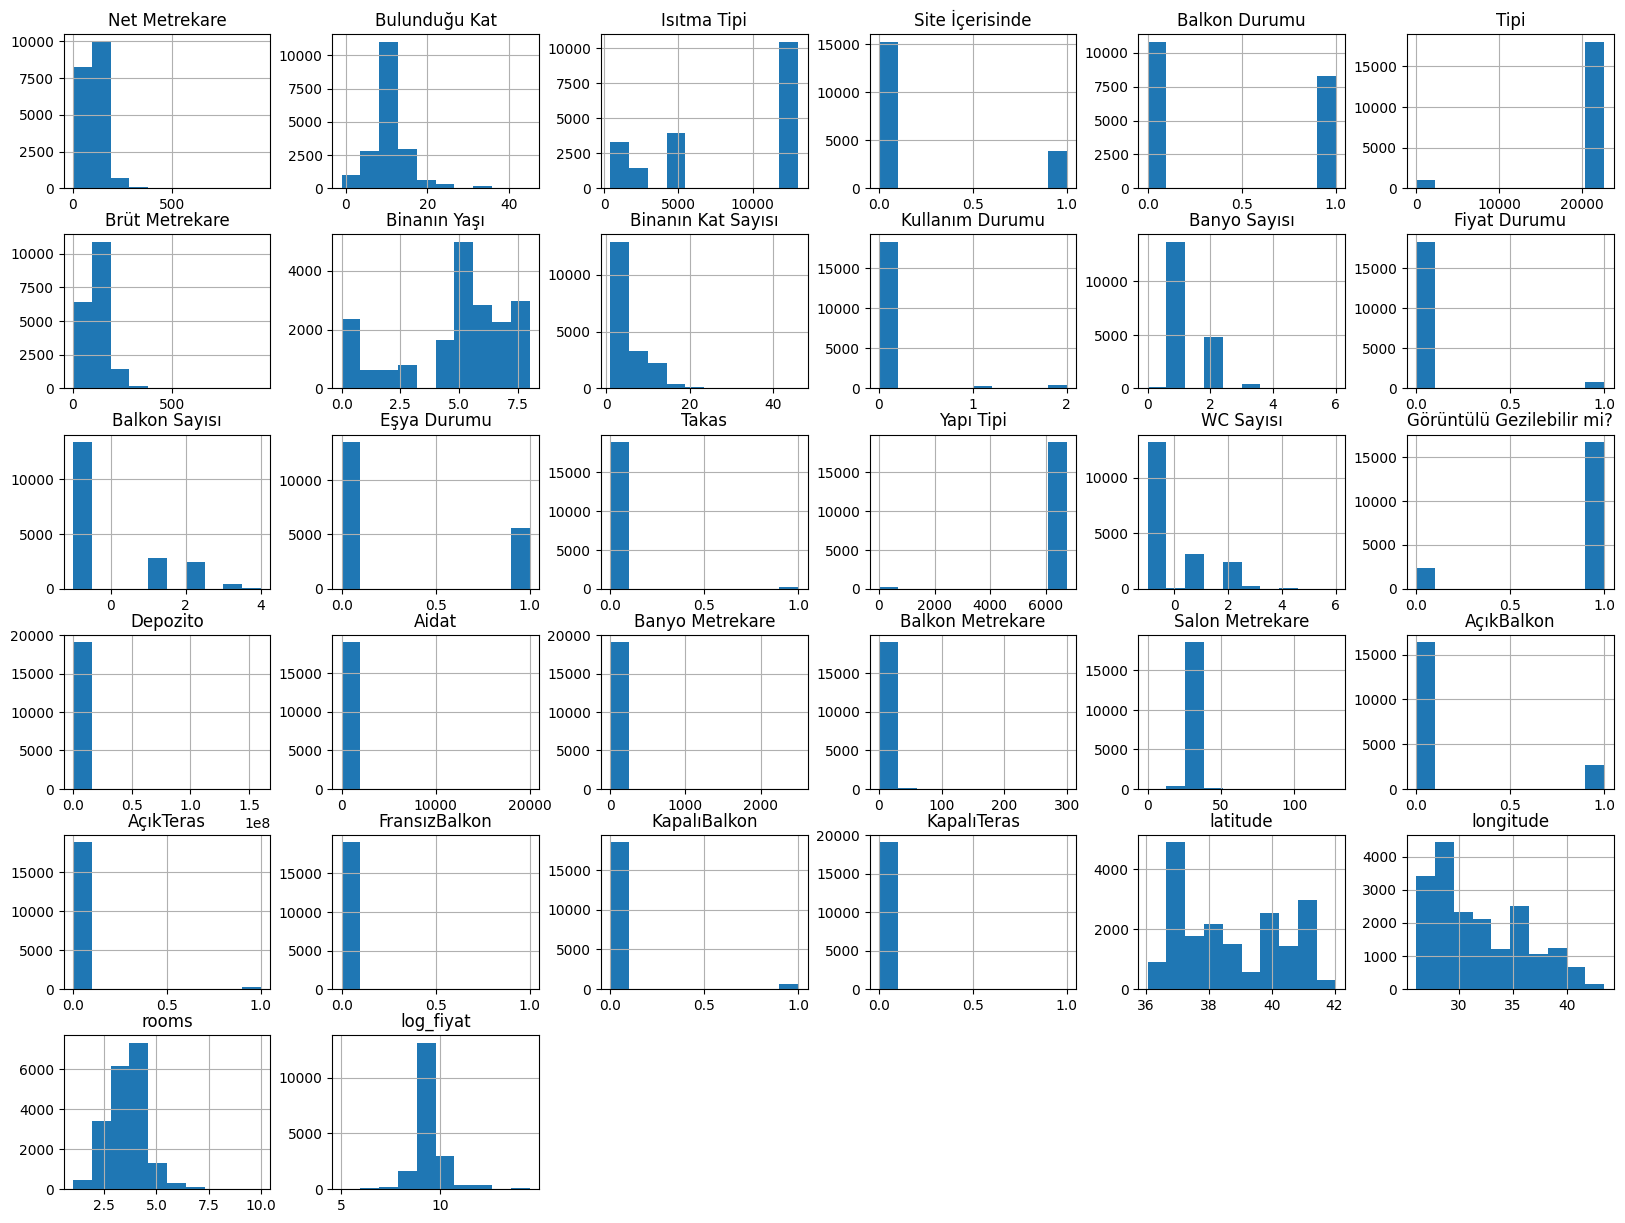

In [515]:
train_data.hist(figsize=(20,15))

<Axes: >

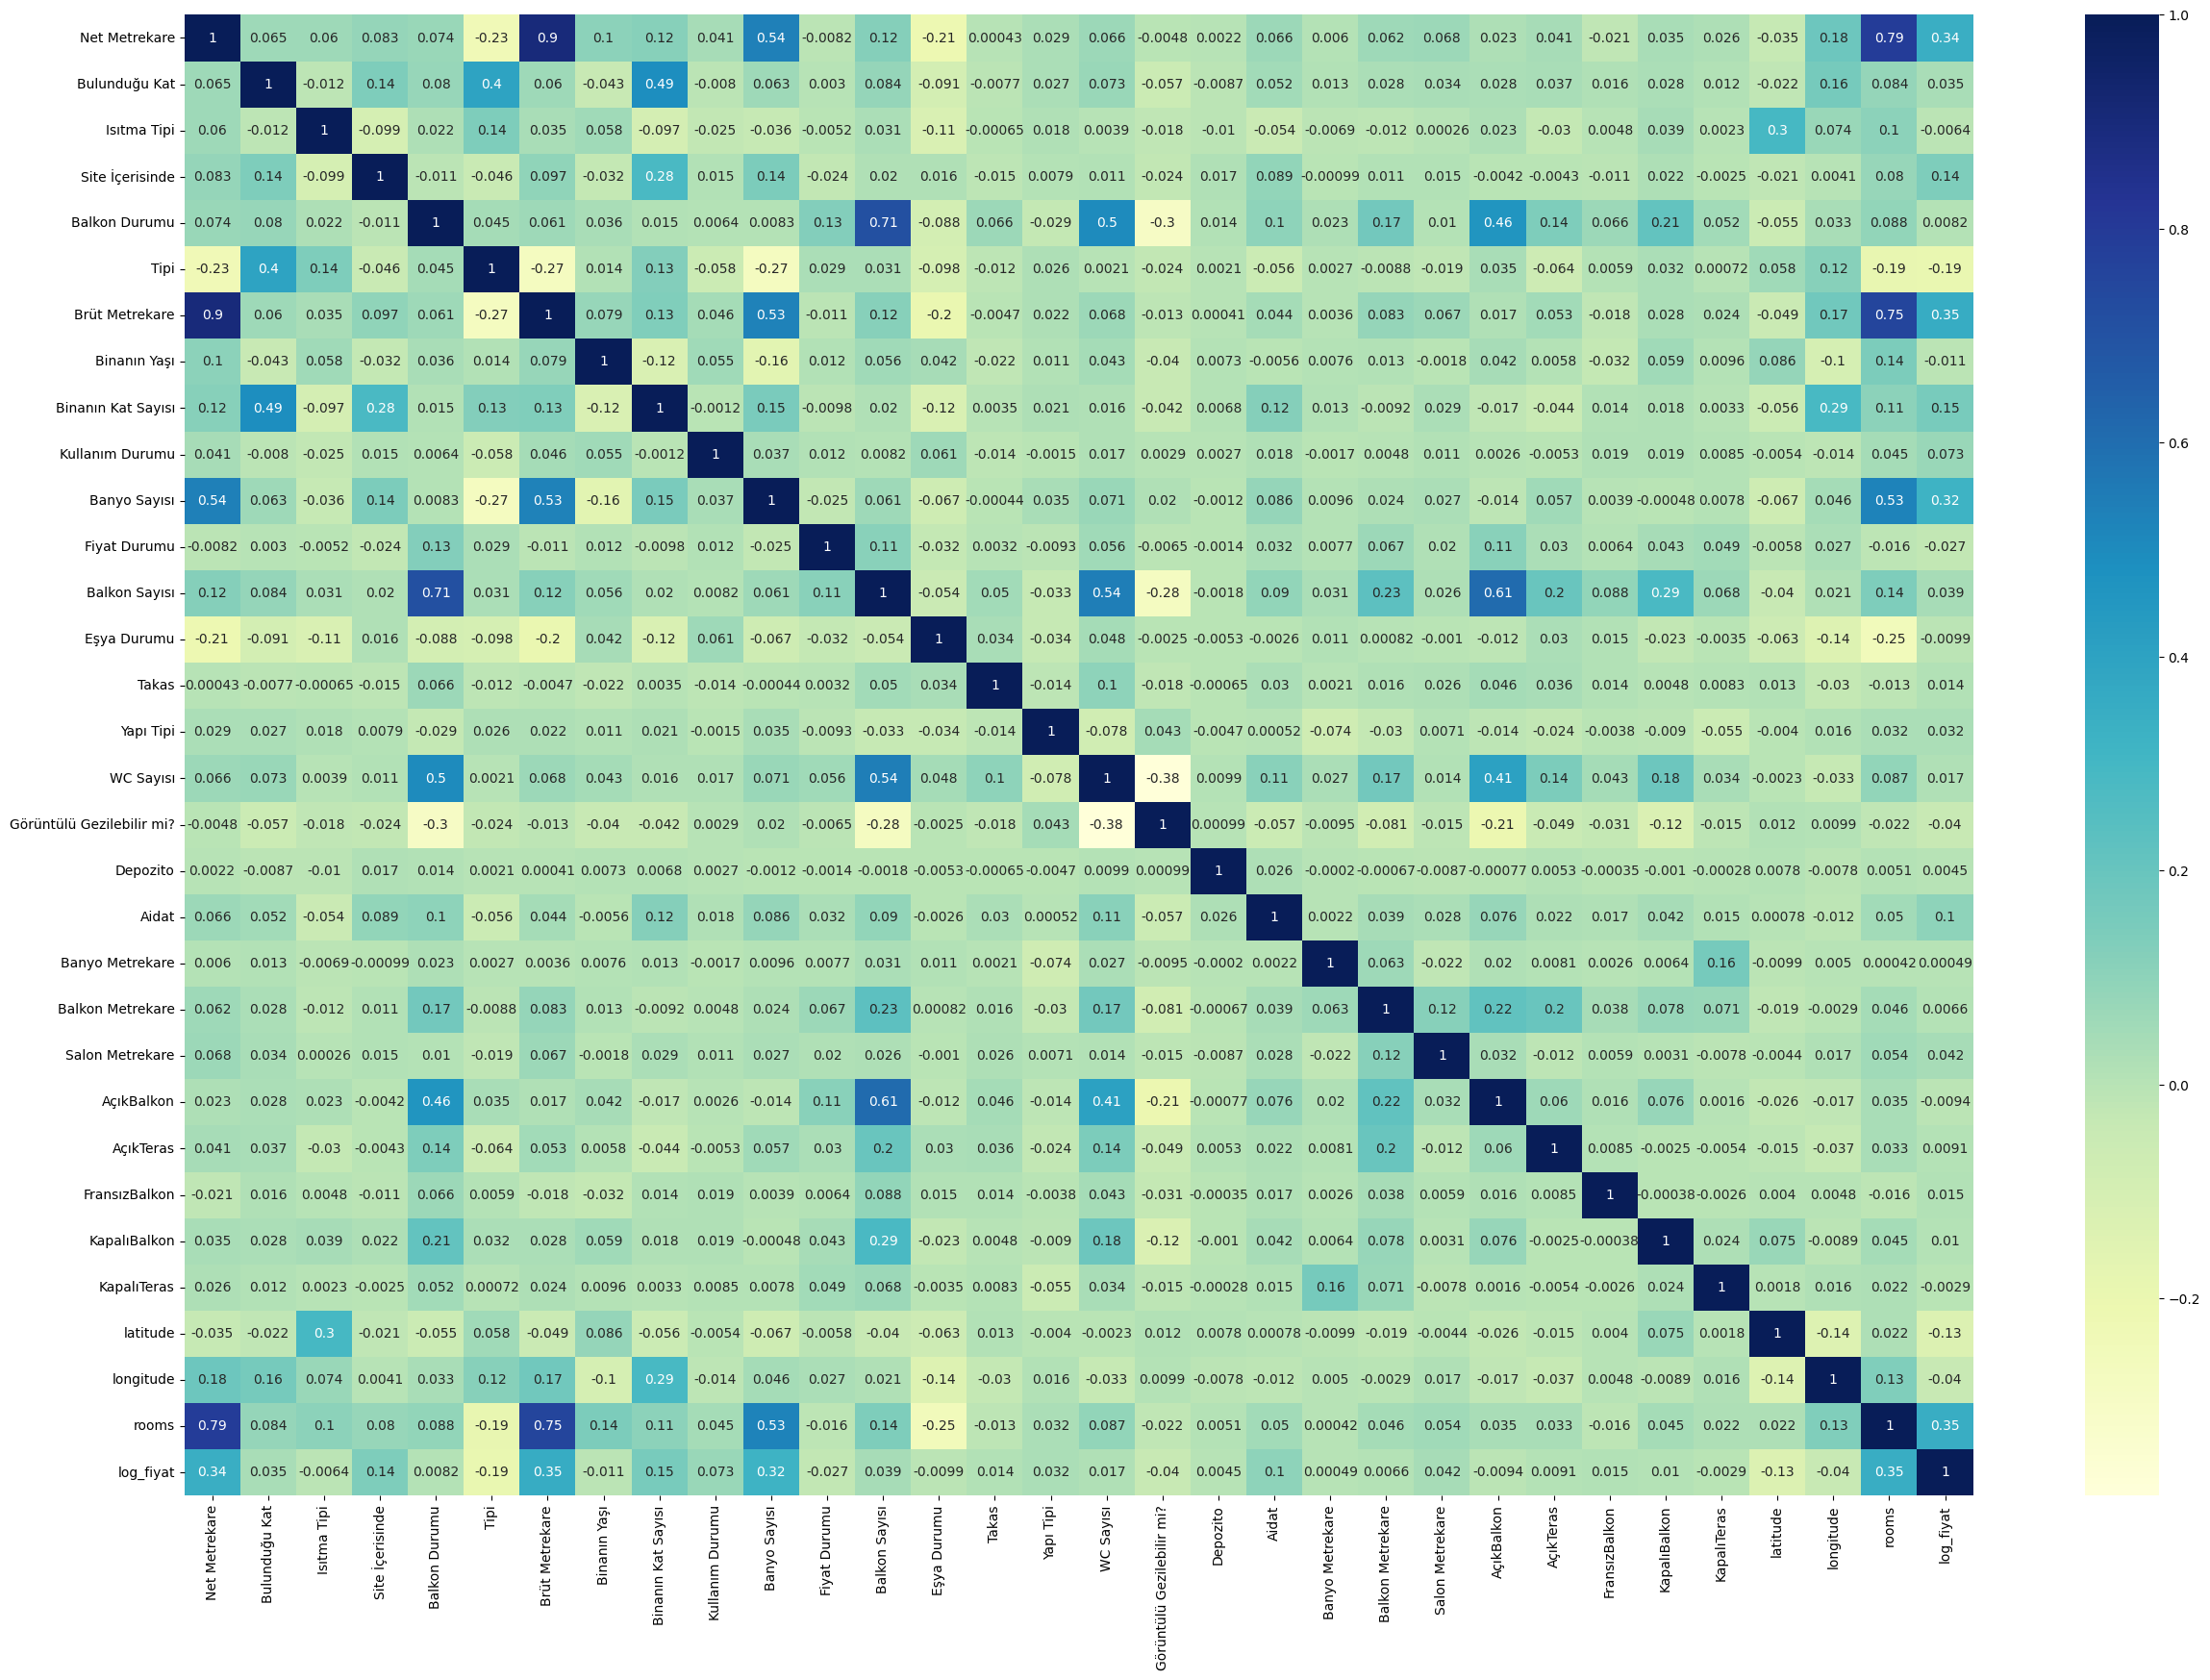

In [516]:
plt.figure(figsize=(30,20))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

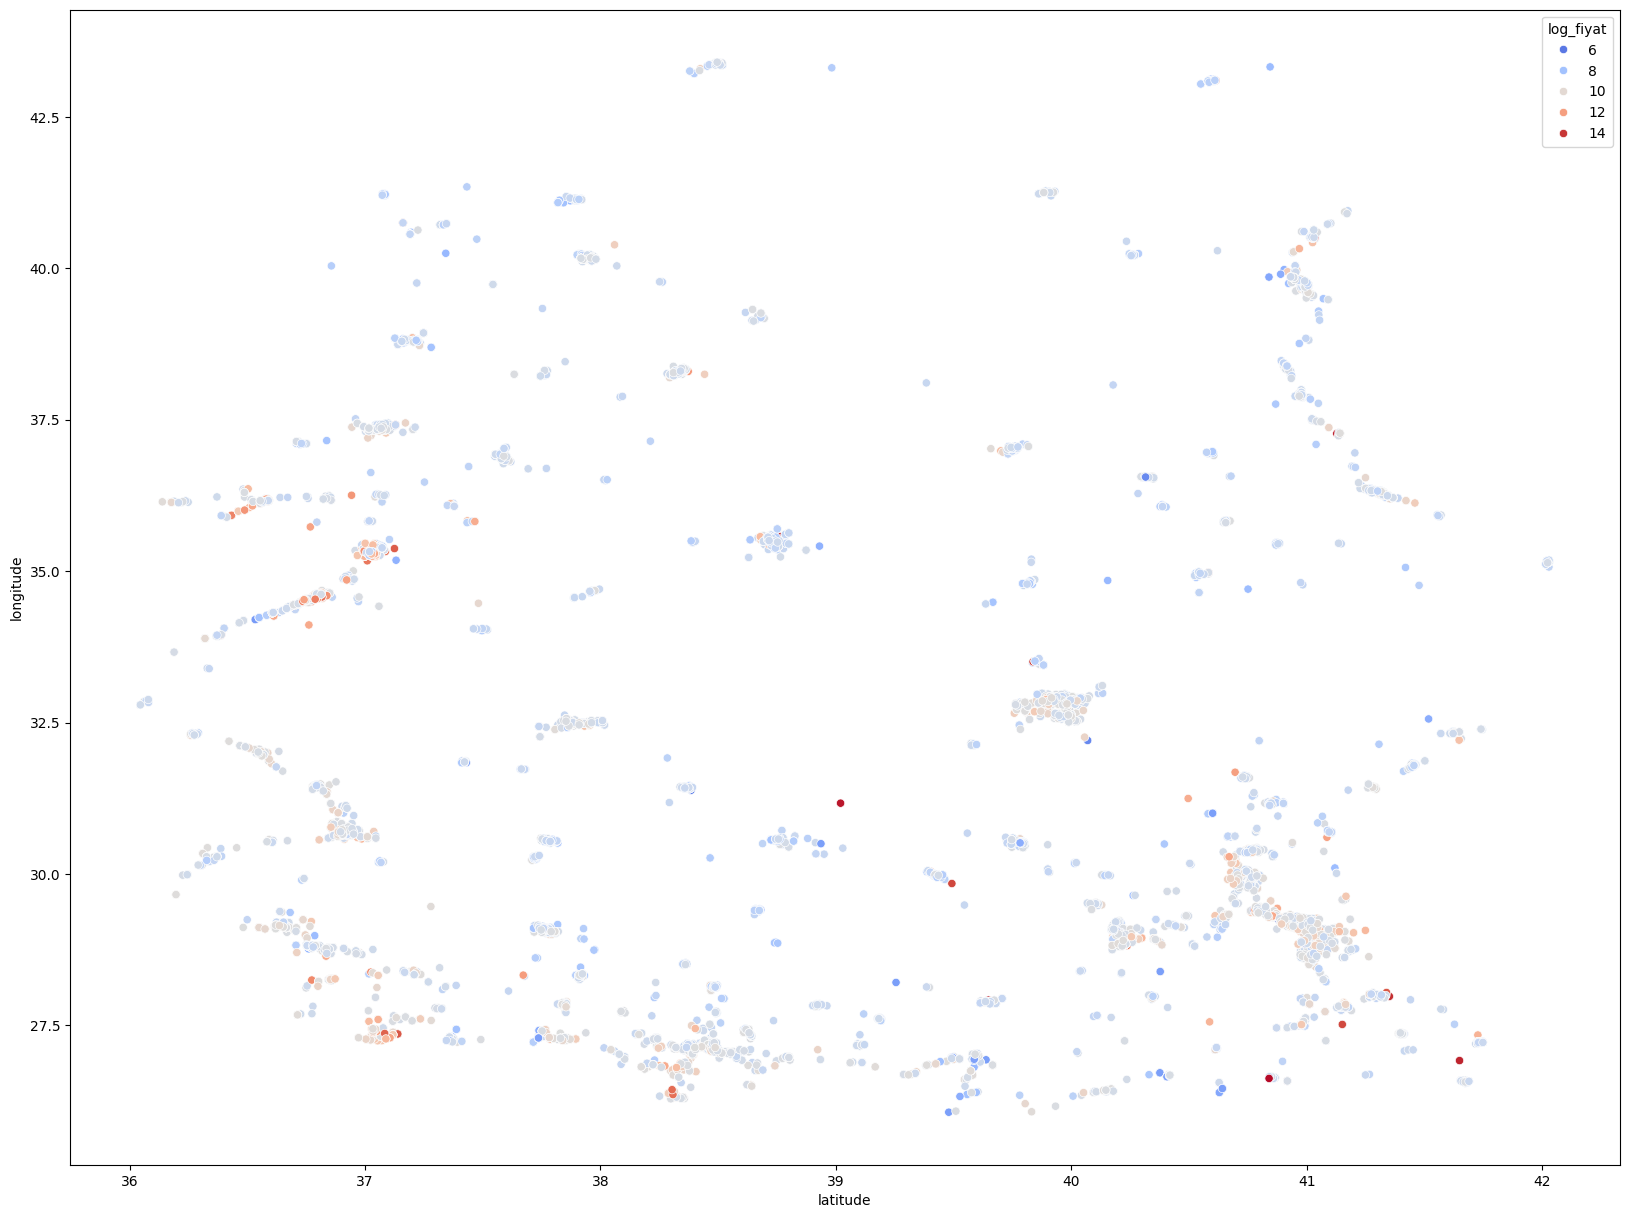

In [517]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='log_fiyat', palette='coolwarm')

In [518]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg = RandomForestRegressor()

reg.fit(X_train_s, y_train)


RandomForestRegressor()

In [519]:
X_test_s = scaler.transform(X_test)
# #
reg.score(X_test_s, y_test)

0.5224439947482483

In [520]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 300 , 500, 800],
    "min_samples_split": [2, 4, 6, 8, 10],
    "max_depth": [None, 4, 6, 8, 10],
}

grid_Search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_Search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 300, 500, 800]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [525]:
best_forest = grid_Search.best_estimator_
print(best_forest)
print(grid_Search.best_params_)


RandomForestRegressor(n_estimators=800)
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 800}


In [522]:
best_forest.score(X_test_s, y_test)

0.5249308429396673

In [529]:
forest = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=500)
forest.fit(X_train_s, y_train)

RandomForestRegressor(n_estimators=500)

In [527]:
forest.score(X_test_s, y_test)

0.5243859658317951